# Import Data



In [ ]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
data = pd.read_excel("/content/desa.xlsx")

In [ ]:
data

,ID,Kabupaten/Kota,Y,X1,X2,X3,X4,X5,X6,X7
0,1,Simeulue,1,2.21,0.47,66.03,7085,65.26,130.44,13.76
1,2,Aceh Singkil,1,3.55,1.03,68.94,8707,67.39,134.70,14.31
2,3,Aceh Selatan,1,2.13,0.46,67.12,8089,64.35,128.60,14.42
3,4,Aceh Tenggara,1,1.62,0.36,69.37,8020,68.14,136.17,14.00
4,5,Aceh Timur,1,2.29,0.61,67.63,8489,68.72,137.35,13.03
...,...,...,...,...,...,...,...,...,...,...
509,510,Puncak,0,8.61,2.63,43.04,5378,65.74,131.81,5.39
510,511,Dogiyai,0,5.55,1.86,54.84,5373,65.73,131.40,10.58
511,512,Intan Jaya,0,8.00,2.17,47.79,5283,65.60,131.05,7.65
512,513,Deiyai,0,11.44,3.90,49.46,4632,65.24,130.42,9.81


#Data Understanding


In [ ]:
data.head()

,ID,Kabupaten/Kota,Y,X1,X2,X3,X4,X5,X6,X7
0,1,Simeulue,1,2.21,0.47,66.03,7085,65.26,130.44,13.76
1,2,Aceh Singkil,1,3.55,1.03,68.94,8707,67.39,134.70,14.31
2,3,Aceh Selatan,1,2.13,0.46,67.12,8089,64.35,128.60,14.42
3,4,Aceh Tenggara,1,1.62,0.36,69.37,8020,68.14,136.17,14.00
4,5,Aceh Timur,1,2.29,0.61,67.63,8489,68.72,137.35,13.03


In [ ]:
data.shape

(514, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              514 non-null    int64  
 1   Kabupaten/Kota  514 non-null    object 
 2   Y               514 non-null    int64  
 3   X1              514 non-null    float64
 4   X2              513 non-null    float64
 5   X3              514 non-null    float64
 6   X4              514 non-null    int64  
 7   X5              514 non-null    float64
 8   X6              514 non-null    float64
 9   X7              514 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 40.3+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,514.0,257.500000,148.523287,1.00,129.2500,257.500,385.7500,514.00
Y,514.0,0.879377,0.326005,0.00,1.0000,1.000,1.0000,1.00
X1,514.0,2.012840,1.988331,0.07,0.8625,1.400,2.3375,13.87
X2,513.0,0.542885,0.778724,0.04,0.1700,0.310,0.5900,6.99
X3,514.0,69.630992,6.515612,31.55,66.4050,69.315,72.8600,86.61
X4,514.0,10259.715953,2694.145948,3975.00,8517.7500,10109.000,11615.5000,23575.00
X5,514.0,69.548152,3.461248,55.27,67.2400,69.905,71.8625,77.65
X6,514.0,139.009144,6.937808,110.45,134.4050,139.695,143.6700,155.51
X7,514.0,12.956206,1.330663,3.61,12.3600,12.870,13.6075,17.79


# EDA

## Categorical

In [ ]:
## Util functions
def plot_count(df, col):
    count = df[col].value_counts()
    plt.title(f'Value counts of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Counts')
    plt.bar(count.index, count.values);
    return count

1    452
0     62
Name: Y, dtype: int64

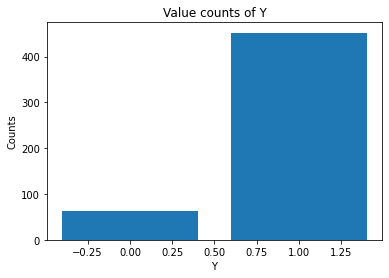

In [ ]:
plot_count(data, 'Y')

## Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

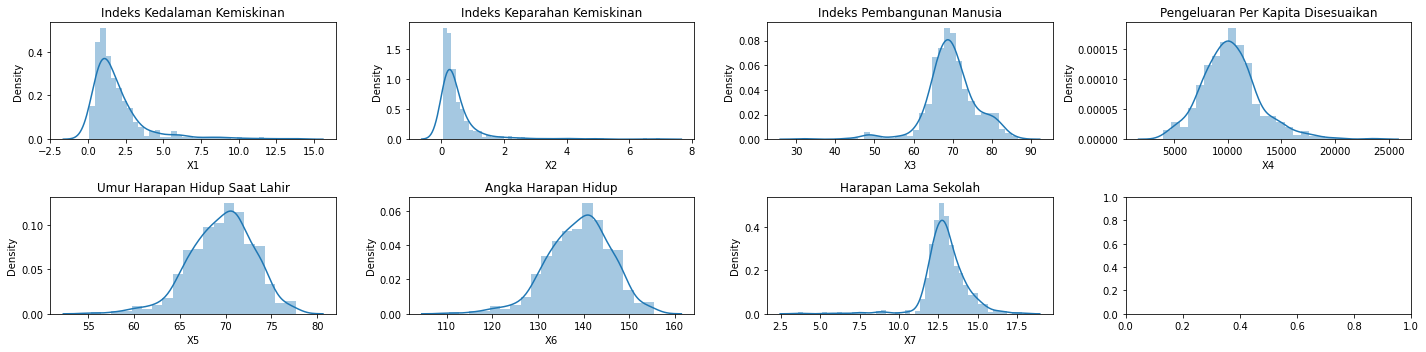

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4 , figsize=(20,5))
axes[0,0].set_title("Indeks Kedalaman Kemiskinan")
axes[0,1].set_title("Indeks Keparahan Kemiskinan")
axes[0,2].set_title("Indeks Pembangunan Manusia")
axes[0,3].set_title("Pengeluaran Per Kapita Disesuaikan")
axes[1,0].set_title("Umur Harapan Hidup Saat Lahir")
axes[1,1].set_title("Angka Harapan Hidup")
axes[1,2].set_title("Harapan Lama Sekolah")

sns.distplot(data["X1"], ax=axes[0,0])
sns.distplot(data["X2"], ax=axes[0,1])
sns.distplot(data["X3"], ax=axes[0,2])
sns.distplot(data["X4"], ax=axes[0,3])
sns.distplot(data["X5"], ax=axes[1,0])
sns.distplot(data["X6"], ax=axes[1,1])
sns.distplot(data["X7"], ax=axes[1,2])

fig.tight_layout()

## Proportion Stage of Class


1    452
0     62
Name: Y, dtype: int64

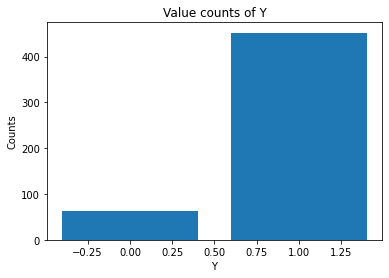

In [ ]:
# PLT sountplot target
plot_count(data, 'Y')

Text(0.5, 1.0, 'Number Per Stage')

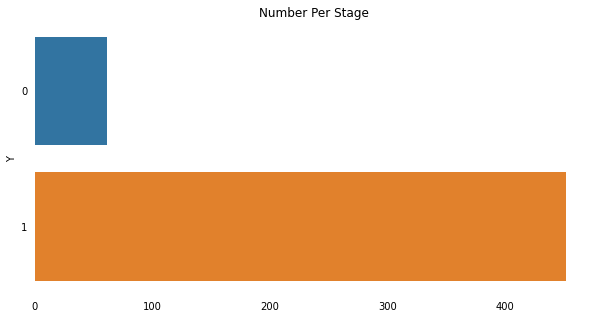

In [ ]:
# SNS countplot target
plt.figure(figsize=(10,5))
sns.countplot(y=data['Y'])
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number Per Stage')

## Correlation

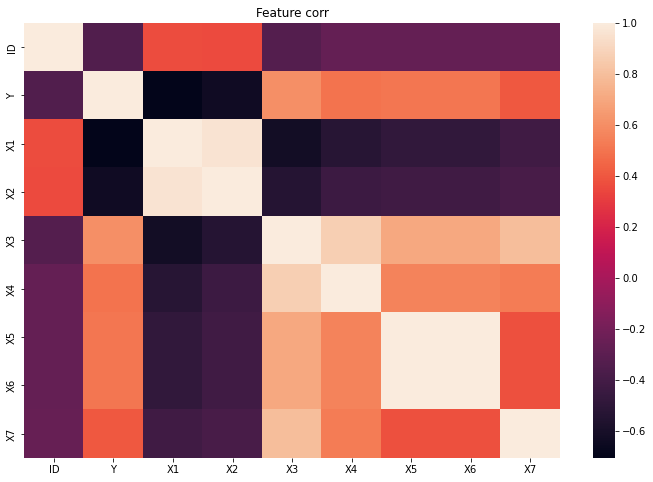

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Feature corr')
sns.heatmap(data.corr());

# Prepocessing

## Missing Value

In [ ]:
data.isnull().sum()

ID                0
Kabupaten/Kota    0
Y                 0
X1                0
X2                1
X3                0
X4                0
X5                0
X6                0
X7                0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              514 non-null    int64  
 1   Kabupaten/Kota  514 non-null    object 
 2   Y               514 non-null    int64  
 3   X1              514 non-null    float64
 4   X2              513 non-null    float64
 5   X3              514 non-null    float64
 6   X4              514 non-null    int64  
 7   X5              514 non-null    float64
 8   X6              514 non-null    float64
 9   X7              514 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 40.3+ KB


In [ ]:
#Melihat kemiringan dari data numerik untuk imputasi
data.skew(axis=0, skipna=True)

ID    0.000000
Y    -2.336522
X1    2.826650
X2    4.336828
X3   -0.827313
X4    0.735581
X5   -0.486367
X6   -0.471153
X7   -1.372026
dtype: float64

In [ ]:
data['X2'].fillna(data['X2'].median(),inplace=True)

In [ ]:
data.isnull().sum()

ID                0
Kabupaten/Kota    0
Y                 0
X1                0
X2                0
X3                0
X4                0
X5                0
X6                0
X7                0
dtype: int64

## Duplication 

In [ ]:
data.duplicated().sum()

0

## Encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Separating categorical and numerical columns
Id_col     = ['ID']
num_cols   = ['X1','X2','X3','X4','X5','X6','X7']

#Biner category columns
bin_cols   = ['Y']

#Label encoding Biner category columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])


In [ ]:
data

,ID,Kabupaten/Kota,Y,X1,X2,X3,X4,X5,X6,X7
0,1,Simeulue,1,2.21,0.47,66.03,7085,65.26,130.44,13.76
1,2,Aceh Singkil,1,3.55,1.03,68.94,8707,67.39,134.70,14.31
2,3,Aceh Selatan,1,2.13,0.46,67.12,8089,64.35,128.60,14.42
3,4,Aceh Tenggara,1,1.62,0.36,69.37,8020,68.14,136.17,14.00
4,5,Aceh Timur,1,2.29,0.61,67.63,8489,68.72,137.35,13.03
...,...,...,...,...,...,...,...,...,...,...
509,510,Puncak,0,8.61,2.63,43.04,5378,65.74,131.81,5.39
510,511,Dogiyai,0,5.55,1.86,54.84,5373,65.73,131.40,10.58
511,512,Intan Jaya,0,8.00,2.17,47.79,5283,65.60,131.05,7.65
512,513,Deiyai,0,11.44,3.90,49.46,4632,65.24,130.42,9.81


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              514 non-null    int64  
 1   Kabupaten/Kota  514 non-null    object 
 2   Y               514 non-null    int64  
 3   X1              514 non-null    float64
 4   X2              514 non-null    float64
 5   X3              514 non-null    float64
 6   X4              514 non-null    int64  
 7   X5              514 non-null    float64
 8   X6              514 non-null    float64
 9   X7              514 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 40.3+ KB


## Scaling Min Max

In [ ]:
fs=['X1','X2','X3','X4','X5','X6','X7']
df_baru=data[fs]
df_baru.head()

,X1,X2,X3,X4,X5,X6,X7
0,2.21,0.47,66.03,7085,65.26,130.44,13.76
1,3.55,1.03,68.94,8707,67.39,134.70,14.31
2,2.13,0.46,67.12,8089,64.35,128.60,14.42
3,1.62,0.36,69.37,8020,68.14,136.17,14.00
4,2.29,0.61,67.63,8489,68.72,137.35,13.03


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_baru[fs] = scaler.fit_transform(df_baru[fs])
df_baru.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,X1,X2,X3,X4,X5,X6,X7
0,0.155072,0.061871,0.626226,0.158673,0.446381,0.443631,0.715797
1,0.252174,0.142446,0.679077,0.241429,0.541555,0.538171,0.754584
2,0.149275,0.060432,0.646023,0.209898,0.405719,0.402796,0.762341
3,0.112319,0.046043,0.686887,0.206378,0.575067,0.570794,0.732722
4,0.160870,0.082014,0.655285,0.230306,0.600983,0.596982,0.664316


In [ ]:
df_baru.to_excel('transform.xlsx', index=False)

In [ ]:
datanew=pd.concat([data['Y'], df_baru], axis=1)

In [ ]:
datanew.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,1,0.155072,0.061871,0.626226,0.158673,0.446381,0.443631,0.715797
1,1,0.252174,0.142446,0.679077,0.241429,0.541555,0.538171,0.754584
2,1,0.149275,0.060432,0.646023,0.209898,0.405719,0.402796,0.762341
3,1,0.112319,0.046043,0.686887,0.206378,0.575067,0.570794,0.732722
4,1,0.160870,0.082014,0.655285,0.230306,0.600983,0.596982,0.664316


In [ ]:
datanew.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,514.0,0.879377,0.326005,0.0,1.000000,1.000000,1.000000,1.0
X1,514.0,0.140786,0.144082,0.0,0.057428,0.096377,0.164312,1.0
X2,514.0,0.072292,0.111947,0.0,0.018705,0.038849,0.078777,1.0
X3,514.0,0.691627,0.118337,0.0,0.633037,0.685888,0.750272,1.0
X4,514.0,0.320649,0.137456,0.0,0.231773,0.312959,0.389821,1.0
X5,514.0,0.637987,0.154658,0.0,0.534853,0.653932,0.741399,1.0
X6,514.0,0.633803,0.153968,0.0,0.531625,0.649024,0.737239,1.0
X7,514.0,0.659112,0.093841,0.0,0.617066,0.653032,0.705042,1.0


# Split data

In [ ]:
feats = datanew.drop(['Y'], axis=1)
target = datanew[['Y']]

In [ ]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
X_train, X_val, y_train, y_val = train_test_split(feats, target, test_size = 0.20, random_state=123)
print(X_train.shape, X_val.shape)

(411, 7) (103, 7)


In [ ]:
y_train.value_counts()

Y
1    359
0     52
dtype: int64

In [ ]:
y_val.value_counts()

Y
1    93
0    10
dtype: int64

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(X_train,y_train)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=X_train.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [ ]:
#Proportion before smote
y_train.value_counts()

Y
1    359
0     52
dtype: int64

In [ ]:
#Proportion after smote
train_smote_Y.value_counts()

Y
1    359
0    359
dtype: int64

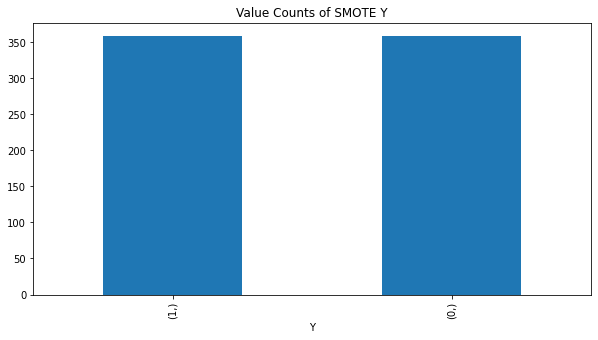

In [ ]:
# PLT sountplot target
plt.figure(figsize=(10,5))
train_smote_Y.value_counts().plot.bar()
plt.title("Value Counts of SMOTE Y")
plt.show()

## Modelling

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import random

In [ ]:
np.random.seed(123)
random.set_seed(123)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

jum_hidden_layer1 = 64
jum_hidden_layer2 = 32
jum_input_unit = X_train.shape[1]
jum_ouput_layer = 1
model = Sequential()
model.add(Dense(jum_hidden_layer1, input_dim=jum_input_unit, activation='relu'))
model.add(Dense(jum_hidden_layer2, activation='relu'))
model.add(Dense(jum_ouput_layer,activation = 'sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
class mycb(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
      print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'terpenuhi.'),
      self.model.stop_training =False

In [ ]:
history = model.fit(train_smote_X, 
                    train_smote_Y,  
                    epochs=300,
                    validation_split=0.2, 
                    shuffle=False,
                    validation_steps=10,  # berapa batch yang akan dieksekusi pada setiap epoch
                    verbose=2,
                    callbacks=mycb()
)

Epoch 1/300
18/18 - 1s - loss: 0.6718 - accuracy: 0.6254 - val_loss: 0.8104 - val_accuracy: 0.0000e+00 - 846ms/epoch - 47ms/step
Epoch 2/300
18/18 - 0s - loss: 0.6273 - accuracy: 0.6324 - val_loss: 0.8150 - val_accuracy: 0.0764 - 46ms/epoch - 3ms/step
Epoch 3/300
18/18 - 0s - loss: 0.6012 - accuracy: 0.6655 - val_loss: 0.8040 - val_accuracy: 0.1597 - 52ms/epoch - 3ms/step
Epoch 4/300
18/18 - 0s - loss: 0.5792 - accuracy: 0.7003 - val_loss: 0.7914 - val_accuracy: 0.2083 - 55ms/epoch - 3ms/step
Epoch 5/300
18/18 - 0s - loss: 0.5547 - accuracy: 0.7195 - val_loss: 0.7657 - val_accuracy: 0.2986 - 54ms/epoch - 3ms/step
Epoch 6/300
18/18 - 0s - loss: 0.5244 - accuracy: 0.7509 - val_loss: 0.7000 - val_accuracy: 0.4861 - 60ms/epoch - 3ms/step
Epoch 7/300
18/18 - 0s - loss: 0.4967 - accuracy: 0.7927 - val_loss: 0.6405 - val_accuracy: 0.6458 - 55ms/epoch - 3ms/step
Epoch 8/300
18/18 - 0s - loss: 0.4634 - accuracy: 0.8118 - val_loss: 0.5863 - val_accuracy: 0.6667 - 64ms/epoch - 4ms/step
Epoch 9/30

## Menyimpan Bobot & Bias

In [ ]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
second_layer_weights = model.layers[1].get_weights()[0]
second_layer_biases  = model.layers[1].get_weights()[1]
third_layer_weights = model.layers[2].get_weights()[0]
third_layer_biases  = model.layers[2].get_weights()[1]

In [ ]:
first_layer_weights_pd = pd.DataFrame(first_layer_weights)
first_layer_weights_pd.T.to_excel('bobotlayer1.xlsx', index=False)

In [ ]:
first_layer_biases_pd = pd.DataFrame(first_layer_biases)
first_layer_biases_pd.T.to_excel('biaslayer1.xlsx', index=False)

In [ ]:
second_layer_weights_pd = pd.DataFrame(second_layer_weights)
second_layer_weights_pd.T.to_excel('bobotlayer2.xlsx', index=False)

In [ ]:
second_layer_biases_pd = pd.DataFrame(second_layer_biases)
second_layer_biases_pd.T.to_excel('biaslayer2.xlsx', index=False)

In [ ]:
third_layer_weights_pd = pd.DataFrame(third_layer_weights)
third_layer_weights_pd.T.to_excel('bobotlayer3.xlsx', index=False)

In [ ]:
third_layer_biases_pd = pd.DataFrame(third_layer_biases)
third_layer_biases_pd.T.to_excel('biaslayer3.xlsx', index=False)

# Perbandingan Plot

## Akurasi

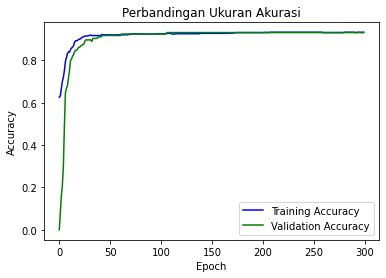

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(history.history['accuracy']))

plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## Loss

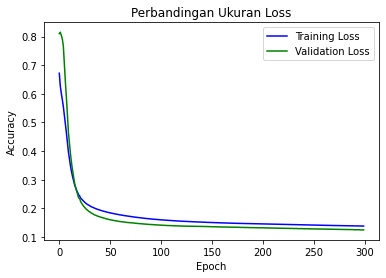

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, history.history['loss'], label='Training Loss', color='blue')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', color = 'green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

# Evaluasi Data Latih SMOTE

In [ ]:
pred1 = model.predict(train_smote_X)
print(pred1)

[[9.95058239e-01]
 [9.95265484e-01]
 [9.98662829e-01]
 [9.99974847e-01]
 [9.99024749e-01]
 [8.44914321e-05]
 [9.99562919e-01]
 [6.84792553e-07]
 [9.75091696e-01]
 [9.99940515e-01]
 [9.99354243e-01]
 [9.98113751e-01]
 [9.98839676e-01]
 [9.99388218e-01]
 [9.97934997e-01]
 [9.01133597e-01]
 [9.98868227e-01]
 [8.35880280e-01]
 [9.99211013e-01]
 [9.99590993e-01]
 [9.27451313e-01]
 [9.61947083e-01]
 [3.44758451e-01]
 [8.83795917e-01]
 [8.46659541e-01]
 [2.13721037e-01]
 [9.54373360e-01]
 [9.98921990e-01]
 [9.99978542e-01]
 [9.92046833e-01]
 [9.97015476e-01]
 [9.88008261e-01]
 [8.30738723e-01]
 [9.93103147e-01]
 [9.97241974e-01]
 [8.47798526e-01]
 [9.94933605e-01]
 [9.98642981e-01]
 [8.11882496e-01]
 [7.24669337e-01]
 [9.99003470e-01]
 [9.99963760e-01]
 [9.99491930e-01]
 [3.28004360e-04]
 [9.89964247e-01]
 [9.78699565e-01]
 [3.96299362e-03]
 [9.99261141e-01]
 [9.90876198e-01]
 [6.81869447e-01]
 [9.90848780e-01]
 [8.92603517e-01]
 [9.94741201e-01]
 [9.99786973e-01]
 [9.99957204e-01]
 [2.109226

In [ ]:
# make probability predictions with the model
prediction1 = model.predict(train_smote_X)
# round predictions 
rounded1 = [round(x[0]) for x in prediction1]
rounded1

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


In [ ]:
data_prediction1 = pd.DataFrame(rounded1, columns=['prediction'])
data_prediction1

,prediction
0,1
1,1
2,1
3,1
4,1
...,...
713,0
714,0
715,0
716,0


In [ ]:
train_smote_Y_new =  train_smote_Y.reset_index()

In [ ]:
train_smote_Y_new = pd.DataFrame(train_smote_Y_new, columns=['Y'])
train_smote_Y_new

,Y
0,1
1,1
2,1
3,1
4,1
...,...
713,0
714,0
715,0
716,0


In [ ]:
hasiltrain = pd.concat([train_smote_Y_new, data_prediction1], axis=1)

In [ ]:
hasiltrain

,Y,prediction
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
713,0,0
714,0,0
715,0,0
716,0,0


In [ ]:
hasiltrain.to_excel('hasiltrain.xlsx', index=False)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_test1 = hasiltrain['Y']
y_preds1 = hasiltrain['prediction']

print('accuracy score: ',accuracy_score(y_test1, y_preds1))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test1,y_preds1))
print('\n')
print(classification_report(y_test1, y_preds1))

accuracy score:  0.947075208913649


confusion matrix: 
 [[334  25]
 [ 13 346]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.95       359
           1       0.93      0.96      0.95       359

    accuracy                           0.95       718
   macro avg       0.95      0.95      0.95       718
weighted avg       0.95      0.95      0.95       718



# Evaluasi Data Latih

In [ ]:
pred2 = model.predict(X_train)
print(pred2)

[[9.9505824e-01]
 [9.9526548e-01]
 [9.9866283e-01]
 [9.9997485e-01]
 [9.9902475e-01]
 [8.4491432e-05]
 [9.9956292e-01]
 [6.8479255e-07]
 [9.7509170e-01]
 [9.9994051e-01]
 [9.9935424e-01]
 [9.9811375e-01]
 [9.9883968e-01]
 [9.9938822e-01]
 [9.9793500e-01]
 [9.0113360e-01]
 [9.9886823e-01]
 [8.3588028e-01]
 [9.9921101e-01]
 [9.9959099e-01]
 [9.2745131e-01]
 [9.6194708e-01]
 [3.4475845e-01]
 [8.8379592e-01]
 [8.4665954e-01]
 [2.1372104e-01]
 [9.5437336e-01]
 [9.9892199e-01]
 [9.9997854e-01]
 [9.9204683e-01]
 [9.9701548e-01]
 [9.8800826e-01]
 [8.3073872e-01]
 [9.9310315e-01]
 [9.9724197e-01]
 [8.4779853e-01]
 [9.9493361e-01]
 [9.9864298e-01]
 [8.1188250e-01]
 [7.2466934e-01]
 [9.9900347e-01]
 [9.9996376e-01]
 [9.9949193e-01]
 [3.2800436e-04]
 [9.8996425e-01]
 [9.7869956e-01]
 [3.9629936e-03]
 [9.9926114e-01]
 [9.9087620e-01]
 [6.8186945e-01]
 [9.9084878e-01]
 [8.9260352e-01]
 [9.9474120e-01]
 [9.9978697e-01]
 [9.9995720e-01]
 [2.1092266e-01]
 [9.4668627e-01]
 [9.9991465e-01]
 [9.9923480e-0

In [ ]:
# make probability predictions with the model
prediction2 = model.predict(X_train)
# round predictions 
rounded2 = [round(x[0]) for x in prediction2]
rounded2

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


In [ ]:
data_prediction2 = pd.DataFrame(rounded2, columns=['prediction'])
data_prediction2

,prediction
0,1
1,1
2,1
3,1
4,1
...,...
406,1
407,1
408,1
409,1


In [ ]:
y_train_new =  y_train.reset_index()

In [ ]:
y_train_new = pd.DataFrame(y_train_new , columns=['Y'])
y_train_new 

,Y
0,1
1,1
2,1
3,1
4,1
...,...
406,1
407,1
408,1
409,1


In [ ]:
hasiltrainbukansmote = pd.concat([y_train_new , data_prediction2], axis=1)

In [ ]:
hasiltrainbukansmote

,Y,prediction
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
406,1,1
407,1,1
408,1,1
409,1,1


In [ ]:
hasiltrainbukansmote.to_excel('hasiltrainbukansmote.xlsx', index=False)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_test2 = hasiltrainbukansmote['Y']
y_preds2 = hasiltrainbukansmote['prediction']

print('accuracy score: ',accuracy_score(y_test2, y_preds2))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test2,y_preds2))
print('\n')
print(classification_report(y_test2, y_preds2))

accuracy score:  0.9586374695863747


confusion matrix: 
 [[ 48   4]
 [ 13 346]]


              precision    recall  f1-score   support

           0       0.79      0.92      0.85        52
           1       0.99      0.96      0.98       359

    accuracy                           0.96       411
   macro avg       0.89      0.94      0.91       411
weighted avg       0.96      0.96      0.96       411



# Evaluasi Data Uji

In [ ]:
pred3 = model.predict(X_val)
print(pred3)

[[9.9956918e-01]
 [9.9974900e-01]
 [9.9990344e-01]
 [9.9987197e-01]
 [1.8883434e-01]
 [9.9609536e-01]
 [9.3856919e-01]
 [7.7136326e-01]
 [9.9863583e-01]
 [6.0510129e-01]
 [1.7729089e-05]
 [9.9969566e-01]
 [9.9896729e-01]
 [9.9119651e-01]
 [9.9593043e-01]
 [9.9992055e-01]
 [9.9987364e-01]
 [9.9999714e-01]
 [9.9847949e-01]
 [9.3408191e-01]
 [1.5926808e-02]
 [9.9940503e-01]
 [4.1064730e-01]
 [1.5668601e-01]
 [9.9978483e-01]
 [9.9401212e-01]
 [8.3102560e-01]
 [9.9760652e-01]
 [9.9919498e-01]
 [9.9989307e-01]
 [9.9746561e-01]
 [9.9944341e-01]
 [8.6559368e-05]
 [8.9707935e-01]
 [9.4719505e-01]
 [9.9956393e-01]
 [9.8085868e-01]
 [9.9929154e-01]
 [9.5784378e-01]
 [9.9960041e-01]
 [9.9917287e-01]
 [9.9861145e-01]
 [9.9971473e-01]
 [9.9943829e-01]
 [9.9427384e-01]
 [3.1244755e-04]
 [9.9183762e-01]
 [9.9667484e-01]
 [9.9993026e-01]
 [9.9975061e-01]
 [9.6329385e-01]
 [3.1236500e-02]
 [9.7993505e-01]
 [8.1320494e-02]
 [9.6550250e-01]
 [9.9017298e-01]
 [9.9974775e-01]
 [9.9929726e-01]
 [9.6030271e-0

In [ ]:
# make probability predictions with the model
prediction3 = model.predict(X_val)
# round predictions 
rounded3 = [round(x[0]) for x in prediction3]
rounded3

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1]

In [ ]:
data_prediction3 = pd.DataFrame(rounded3, columns=['prediction'])
data_prediction3

,prediction
0,1
1,1
2,1
3,1
4,0
...,...
98,1
99,1
100,1
101,0


In [ ]:
y_val_new =  y_val.reset_index()

In [ ]:
y_val_new = pd.DataFrame(y_val_new, columns=['Y'])
y_val_new

,Y
0,1
1,1
2,1
3,1
4,0
...,...
98,1
99,1
100,1
101,1


In [ ]:
hasiltest = pd.concat([y_val_new, data_prediction3], axis=1)

In [ ]:
hasiltest

,Y,prediction
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
98,1,1
99,1,1
100,1,1
101,1,0


In [ ]:
hasiltest.to_excel('hasiltest.xlsx', index=False)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_test3 = hasiltest['Y']
y_preds3 = hasiltest['prediction']

print('accuracy score: ',accuracy_score(y_test3, y_preds3))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test3,y_preds3))
print('\n')
print(classification_report(y_test3, y_preds3))

accuracy score:  0.9514563106796117


confusion matrix: 
 [[10  0]
 [ 5 88]]


              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.95      0.97        93

    accuracy                           0.95       103
   macro avg       0.83      0.97      0.89       103
weighted avg       0.97      0.95      0.96       103

